In [329]:
import matplotlib.pyplot as plt
import pandas as pd

In [330]:
df=pd.read_csv('attributes_data.csv')
labels_data = pd.read_csv('labels_data.csv')

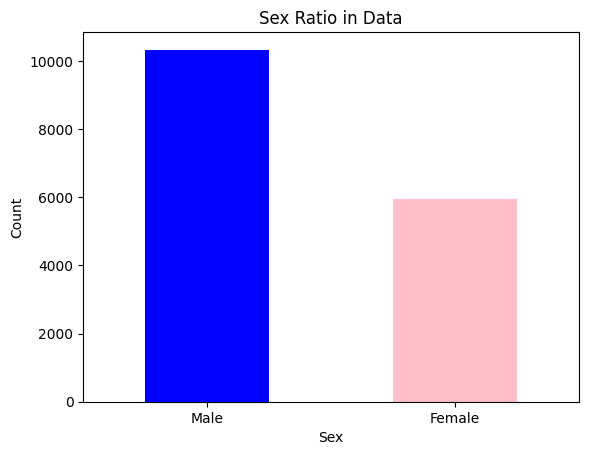

In [331]:
sex_counts = df['Gender'].value_counts()
sex_counts.plot(kind='bar', color=['blue', 'pink'], rot=0)
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Sex Ratio in Data')
plt.xticks(ticks=[0, 1], labels=['Male', 'Female'])
plt.show()

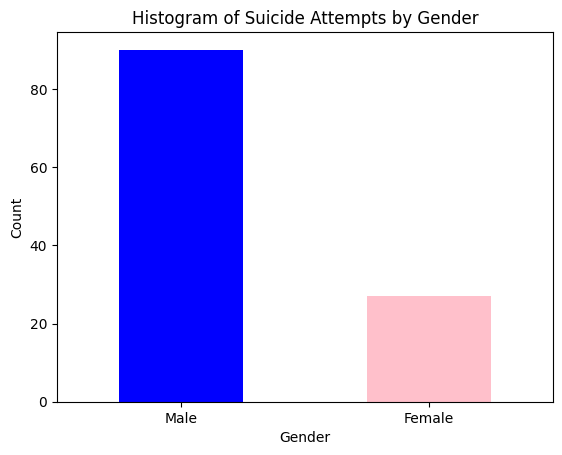

In [332]:
# Filter the dataframe for individuals who attempted suicide more than 0 times
attempted_suicide = df[labels_data['Number_of_Suicide_Attempts_in_Last_Year'] > 0]

# Plot the histogram
attempted_suicide['Gender'].value_counts().plot(kind='bar', color=['blue', 'pink'], rot=0)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Histogram of Suicide Attempts by Gender')
plt.xticks(ticks=[0, 1], labels=['Male', 'Female'])
plt.show()

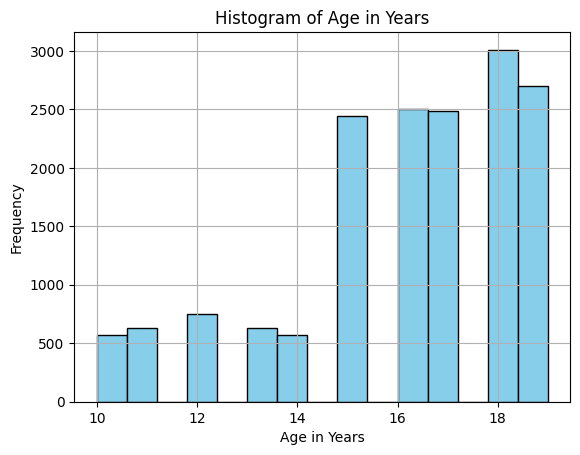

In [333]:
df['Age_in_Years'].hist(bins=15, color='skyblue', edgecolor='black')
plt.xlabel('Age in Years')
plt.ylabel('Frequency')
plt.title('Histogram of Age in Years')
plt.show()

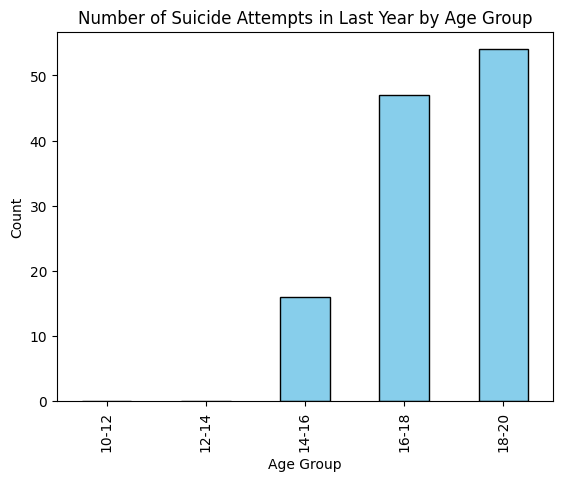

In [334]:
# Filter the dataframe for individuals who attempted suicide more than 0 times
# attempted_suicide = df[labels_data['Number_of_Suicide_Attempts_in_Last_Year'] > 0]

# Create age groups
labels = ['10-12', '12-14', '14-16', '16-18', '18-20']
bins = [10, 12, 14, 16, 18, 20]
attempted_suicide2 = attempted_suicide.assign(Age_Group=pd.cut(attempted_suicide['Age_in_Years'], bins=bins, labels=labels, right=False))

# Plot the data
age_group_counts = attempted_suicide2['Age_Group'].value_counts().sort_index()
age_group_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Number of Suicide Attempts in Last Year by Age Group')
plt.show()

In [335]:
attempted_suicide = attempted_suicide[attempted_suicide['Age_in_Years'] >= 14]
df = df[df['Age_in_Years'] >= 14]

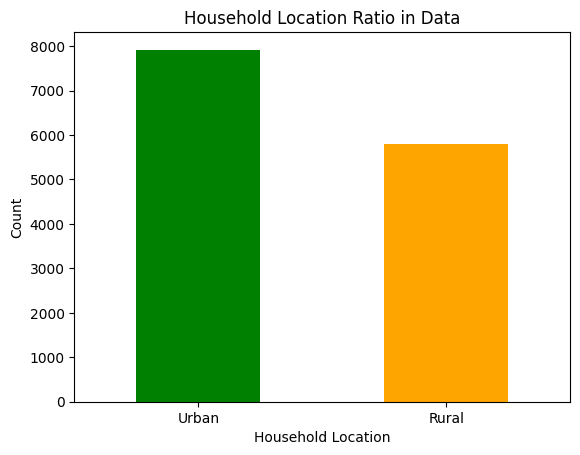

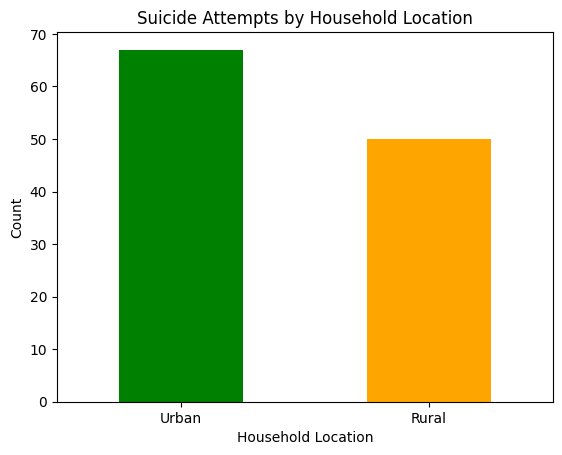

In [336]:
# Plot the dataset ratio for Household_Location_(Urban_or_Rural)
location_counts = df['Household_Location_(Urban_or_Rural)'].value_counts()
location_counts.plot(kind='bar', color=['green', 'orange'], rot=0)
plt.xlabel('Household Location')
plt.ylabel('Count')
plt.title('Household Location Ratio in Data')
plt.xticks(ticks=[0, 1], labels=['Urban', 'Rural'])
plt.show()

# Filter the dataframe for individuals who attempted suicide more than 0 times
# attempted_suicide = df[labels_data['Number_of_Suicide_Attempts_in_Last_Year'] > 0]

# Plot the suicide ratio for Household_Location_(Urban_or_Rural)
suicide_location_counts = attempted_suicide['Household_Location_(Urban_or_Rural)'].value_counts()
suicide_location_counts.plot(kind='bar', color=['green', 'orange'], rot=0)
plt.xlabel('Household Location')
plt.ylabel('Count')
plt.title('Suicide Attempts by Household Location')
plt.xticks(ticks=[0, 1], labels=['Urban', 'Rural'])
plt.show()

In [337]:
total_attempted_suicide=attempted_suicide.shape[0]
total_teenagers=df.shape[0]

In [338]:
# Calculate the percentage of teenagers who have used drugs and attempted suicide
teenagers_consumed_drugs=df['Ever_Used_Drugs'].sum()

teenagers_consumed_drugs_and_attempted_suicide=attempted_suicide['Ever_Used_Drugs'].sum()
# Calculate the chance of suicide for those who have consumed alcohol
chance_suicide_consumed_drugs = teenagers_consumed_drugs_and_attempted_suicide / teenagers_consumed_drugs

# Calculate the chance of suicide for the general population
chance_suicide_general_population = total_attempted_suicide / total_teenagers

# Calculate the increase in chance (in multiply)
increase_in_chance = (chance_suicide_consumed_drugs / chance_suicide_general_population)

# Print the increase in chance
print(f"The chance of suicide increased by  {increase_in_chance:.2f} times if a person ever consumed drugs.")


The chance of suicide increased by  4.19 times if a person ever consumed drugs.


In [339]:
teenagers_consumed_alcohol=df['Ever_Consumed_Alcohol'].sum()

teenagers_consumed_alcohol_and_attempted_suicide=attempted_suicide['Ever_Consumed_Alcohol'].sum()
# Calculate the chance of suicide for those who have consumed alcohol
chance_suicide_consumed_alcohol = teenagers_consumed_alcohol_and_attempted_suicide / teenagers_consumed_alcohol

# Calculate the chance of suicide for the general population
chance_suicide_general_population = total_attempted_suicide / total_teenagers

# Calculate the increase in chance (in multiply)
increase_in_chance = (chance_suicide_consumed_alcohol / chance_suicide_general_population)

# Print the increase in chance
print(f"The chance of suicide increased by  {increase_in_chance:.2f} times if a person ever consumed alcohol.")


The chance of suicide increased by  2.64 times if a person ever consumed alcohol.


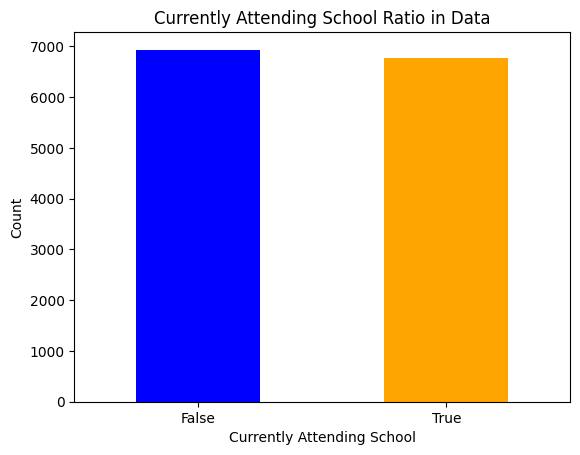

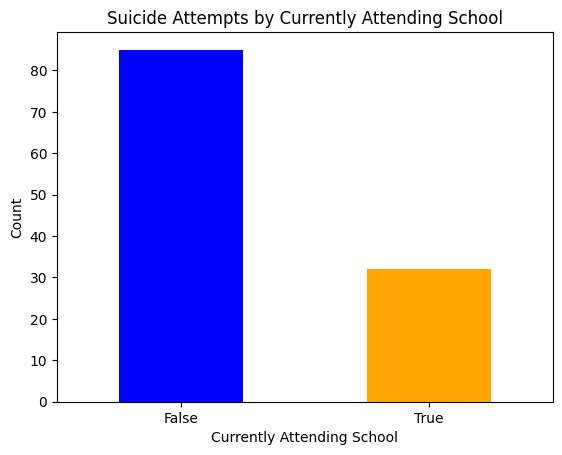

In [340]:
# Plot the dataset ratio for Currently_Attending_School
school_counts = df['Currently_Attending_School'].value_counts()
school_counts.plot(kind='bar', color=['blue', 'orange'], rot=0)
plt.xlabel('Currently Attending School')
plt.ylabel('Count')
plt.title('Currently Attending School Ratio in Data')
plt.xticks(ticks=[0, 1], labels=['False', 'True'])
plt.show()

# Plot the suicide ratio for Currently_Attending_School
suicide_school_counts = attempted_suicide['Currently_Attending_School'].value_counts()
suicide_school_counts.plot(kind='bar', color=['blue', 'orange'], rot=0)
plt.xlabel('Currently Attending School')
plt.ylabel('Count')
plt.title('Suicide Attempts by Currently Attending School')
plt.xticks(ticks=[0, 1], labels=['False', 'True'])
plt.show()

In [341]:
# Calculate the number of teenagers who are currently attending school
teenagers_attending_school = df['Currently_Attending_School'].sum()

# Calculate the number of teenagers who are currently attending school and attempted suicide
teenagers_attending_school_and_attempted_suicide = attempted_suicide['Currently_Attending_School'].sum()

# Calculate the chance of suicide for those who are currently attending school
chance_suicide_attending_school = teenagers_attending_school_and_attempted_suicide / teenagers_attending_school

# Calculate the decrease in chance (in multiply)
decrease_in_chance = chance_suicide_attending_school / chance_suicide_general_population

# Print the decrease in chance
print(f"The chance of suicide decreased by {decrease_in_chance:.2f} times if a person is currently attending school.")

The chance of suicide decreased by 0.55 times if a person is currently attending school.


In [343]:
# Calculate the number of teenagers whose father ever physically abused their mother
teenagers_father_abused_mother = df['Father_Ever_Physically_Abused_Mother'].sum()

# Calculate the number of teenagers whose father ever physically abused their mother and who attempted suicide
teenagers_father_abused_mother_and_attempted_suicide = attempted_suicide['Father_Ever_Physically_Abused_Mother'].sum()

# Calculate the chance of suicide for those whose father ever physically abused their mother
chance_suicide_father_abused_mother = teenagers_father_abused_mother_and_attempted_suicide / teenagers_father_abused_mother

# Calculate the increase in chance (in multiply)
increase_in_chance = (chance_suicide_father_abused_mother / chance_suicide_general_population)

# Print the increase in chance
print(f"The chance of suicide increased by {increase_in_chance:.2f} times if a teenager's father ever physically abused their mother.")

The chance of suicide increased by 1.63 times if a teenager's father ever physically abused their mother.


In [344]:
# Filter the dataframe for individuals who have more than 1 close friend
more_than_one_friend = df[df['Number_of_Close_Friends'] > 1]

# Calculate the number of teenagers who have more than one close friend
teenagers_more_than_one_friend = more_than_one_friend.shape[0]

# Calculate the number of teenagers who have more than one close friend and attempted suicide
teenagers_more_than_one_friend_and_attempted_suicide = attempted_suicide[attempted_suicide['Number_of_Close_Friends'] > 1].shape[0]

# Calculate the chance of suicide for those who have more than one close friend
chance_suicide_more_than_one_friend = teenagers_more_than_one_friend_and_attempted_suicide / teenagers_more_than_one_friend

# Calculate the increase in chance (in multiply)
increase_in_chance = (chance_suicide_more_than_one_friend / chance_suicide_general_population)

# Print the increase in chance
print(f"The chance of suicide decreased by {increase_in_chance:.2f} times if a person has more than one close friend.")

The chance of suicide decreased by 0.90 times if a person has more than one close friend.
